# Section A: Data Preprocessing

### Step A.0: Restart the session

In [191]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

### Step A.1: Import relevant libraries

In [252]:
#Standard libraries for data analysis:   
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#sklearn modules for Model Selection:
from sklearn.pipeline import Pipeline
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:   
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

### Step A.2: Set up the current working directory

In [193]:
filedict = 'LCDataDictionary2020Q3.xlsx'
filename = 'Loan_status_2007-2020Q3.csv'
absolute_path = os.path.abspath(os.path.dirname(filename))

### Step A.3: Import the dataset

In [194]:
chunksize = 500000
iterable = pd.read_csv(absolute_path+'/'+filename, iterator=True, chunksize=chunksize)
df = pd.concat([chunk[pd.to_datetime(chunk['issue_d']).dt.year >= 2015] for chunk in iterable])
df = df[df.term == ' 36 months'].reset_index(drop=True)

C:\Users\wangq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\wangq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\wangq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\wangq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (58,117) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(c

In [195]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,120122535,12000.0,12000.0,12000.0,36 months,7.97%,375.88,A,A5,associate,10+ years,OWN,42000.0,Source Verified,Sep-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,923xx,CA,27.74,0.0,Jun-1996,715.0,719.0,0.0,NaN,80.0,9.0,1.0,11457.0,37%,16.0,w,0.00,0.00,13500.44,13500.44,12000.00,1500.44,0.0,0.0,0.0,May-2020,2591.95,NaN,May-2020,694.0,690.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,30502.0,1.0,2.0,1.0,3.0,8.0,19045.0,73.0,2.0,4.0,7117.0,53.0,31000.0,1.0,1.0,2.0,7.0,3389.0,7144.0,53.9,0.0,0.0,131.0,255.0,1.0,1.0,0.0,14.0,NaN,8.0,NaN,0.0,2.0,6.0,2.0,2.0,7.0,7.0,9.0,6.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,119374887,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,Nurse,10+ years,MORTGAGE,155000.0,Source Verified,Sep-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,080xx,NJ,12.35,2.0,Sep-2005,715.0,719.0,1.0,10.0,NaN,20.0,0.0,48309.0,34.1%,42.0,w,6158.89,6158.89,31838.67,31838.67,25841.11,5997.56,0.0,0.0,0.0,May-2020,0.00,Jul-2020,May-2020,674.0,670.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,405751.0,2.0,1.0,1.0,1.0,8.0,15582.0,78.0,4.0,7.0,14049.0,40.0,142600.0,0.0,2.0,2.0,8.0,22542.0,81313.0,34.5,0.0,0.0,91.0,144.0,1.0,1.0,3.0,1.0,24.0,1.0,10.0,0.0,7.0,10.0,12.0,27.0,3.0,18.0,36.0,10.0,20.0,0.0,0.0,0.0,5.0,94.9,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,CVD19SKIP,INCOMECURT,ACTIVE,2.0,0.00,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,123.08000,6189.66,1062.71,N
2,3,120122034,16000.0,16000.0,16000.0,36 months,7.97%,5

In [196]:
print(df.groupby([pd.to_datetime(df.issue_d).dt.year,'term'])['id'].count().rename("count"))

issue_d  term      
2015      36 months    283173
2016      36 months    323495
2017      36 months    320419
2018      36 months    344671
2019      36 months    349414
2020      36 months    100909
Name: count, dtype: int64


### Step A.4: Create and Check target variable distribution

In [197]:
# Creating objective variable
df['Default_flg'] = np.where(df.loan_status == 'Charged Off', 1, 
                                 np.where(df.loan_status == 'Default', 1, 0))
print(df.groupby(['loan_status','Default_flg'])['id'].count().rename("count"))
print("df.shape: ", df.shape)
df.info()
#print(df.head())

loan_status         Default_flg
Charged Off         1              173869
Current             0              645536
Default             1                 307
Fully Paid          0              883872
In Grace Period     0                5793
Issued              0                1573
Late (16-30 days)   0                1650
Late (31-120 days)  0                9481
Name: count, dtype: int64
df.shape:  (1722081, 143)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722081 entries, 0 to 1722080
Columns: 143 entries, Unnamed: 0 to Default_flg
dtypes: float64(106), int32(1), int64(1), object(35)
memory usage: 1.8+ GB


In [198]:
#df.groupby(pd.to_datetime(df.issue_d).dt.year).loan_status.value_counts(ascending=False,dropna=False)
c = df.groupby([pd.to_datetime(df.issue_d).dt.year,'loan_status'])['id'].count().rename("count")
print((100* c/c.groupby(level=[0]).sum()).round(2).astype(str) + '%')

issue_d  loan_status       
2015     Charged Off           14.89%
         Fully Paid            85.11%
2016     Charged Off           15.86%
         Current                0.01%
         Default                0.02%
         Fully Paid            84.11%
         In Grace Period         0.0%
         Late (16-30 days)       0.0%
         Late (31-120 days)     0.01%
2017     Charged Off           13.28%
         Current               21.93%
         Default                0.04%
         Fully Paid            63.83%
         In Grace Period        0.32%
         Late (16-30 days)      0.09%
         Late (31-120 days)     0.51%
2018     Charged Off            8.39%
         Current               56.05%
         Default                0.02%
         Fully Paid             33.8%
         In Grace Period        0.56%
         Late (16-30 days)      0.16%
         Late (31-120 days)     1.02%
2019     Charged Off            2.54%
         Current               82.07%
         Default      

In [39]:
c = df.groupby([pd.to_datetime(df.issue_d).dt.year,'Default_flg'])['id'].count().rename("count")
print((100* c/c.groupby(level=[0]).sum()).round(2).astype(str) + '%')

issue_d  Default_flg
2015     0              85.11%
         1              14.89%
2016     0              84.12%
         1              15.88%
2017     0              86.68%
         1              13.32%
2018     0              91.59%
         1               8.41%
2019     0              97.45%
         1               2.55%
2020     0              99.96%
         1               0.04%
Name: count, dtype: object


In [40]:
print(df.info())
df.describe(include='all') # analytical summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722081 entries, 0 to 1722080
Columns: 143 entries, Unnamed: 0 to Default_flg
dtypes: float64(106), int32(1), int64(1), object(35)
memory usage: 1.8+ GB
None


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,Default_flg
count,1.722081e+06,1722081.0,1.722081e+06,1.722081e+06,1.722081e+06,1722081,1722081,1.722081e+06,1722081,1722081,1542217,1580867,1722081,1.722081e+06,1722081,1722081,1722081,1722081,1722081,1722081,1706059,1722080,1722081,1.720327e+06,1.722081e+06,1722081,1.722081e+06,1.722081e+06,1.722081e+06,835140.000000,261437.000000,1.722081e+06,1.722081e+06,1.722081e+06,1720348,1.722081e+06,1722081,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1718637,1.722081e+06,664340,1722048,1.722081e+06,1.722081e+06,1.722081e+06,451242.000000,1722081.0,1722081,1.193680e+05,119365.000000,110944,1.722081e+06,1.722081e+06,1.722081e+06,1.453800e+06,1.453800e+06,1.453800e+06,1.453800e+06,1.404866e+06,1.453800e+06,1.238025e+06,1.453800e+06,1.453800e+06,1.453800e+06,1.453543e+06,1.722081e+06,1.453800e+06,1.453800e+06,1.453800e+06,1.722081e+06,1.721999e+06,1.700660e+06,1.699758e+06,1.722081e+06,1.722081e+06,1.663645e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.701830e+06,396448.000000,1.522518e+06,568822.000000,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722080e+06,1.722081e+06,1.722081e+06,1.664959e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722079e+06,1.700333e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.118510e+05,111852.000000,111852.000000,111852,111852.000000,111852.000000,111852.000000,109540.000000,111852.000000,111852.000000,111852.000000,111852.000000,1697903,85363,85358,85361,85363.000000,109544.000000,85363,85363,85363,85363.000000,85363.000000,85202,107919.000000,109544.000000,109544.000000,1722081,1.722081e+06
unique,NaN,1722081.0,NaN,NaN,NaN,1,318,NaN,7,35,3

## Section B: Variables Profiling

There're **140+** variables that represent different aspects of a customer's profile. The groups and variables belonging to each group are listed below:
<br>
<br>__1. (CSRP) Customer Self-Reported personal and financial profile:__ emp_title, emp_length, addr_state, home_ownership, annual_inc, purpose, title, annual_inc_joint
<br>**2. (CLCR) Customer Lending Club relationship:** id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, verification_status, issue_d, initial_list_status, policy_code, application_type, verification_status_joint
<br>**3. (CLCB) Customer Lending Club behaviors:** loan_status, pymnt_plan, out_prnc, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, hardship_flag, hardship_type, hardship_reason, hardship_status, deferral_term, hardship_amount, hardship_start_date, hardship_end_date, payment_plan_start_date, hardship_length, hardship_dpd, hardship_loan_status, orig_projected_additional_accrued_interest, hardship_payoff_balance_amount, hardship_last_payment_amount, debt_settlement_flag
<br>__4. FICO:__ dti, dti_joint,	delinq_2yrs,	earliest_cr_line,	fico_range_low,	fico_range_high,	inq_last_6mths,	mths_since_last_delinq,	mths_since_last_record,	open_acc,	pub_rec	revol_bal,	revol_util,	total_acc,	last_fico_range_high,	last_fico_range_low,	collections_12_mths_ex_med,	mths_since_last_major_derog,	acc_now_delinq,	tot_coll_amt,	tot_cur_bal,	open_acc_6m,	open_act_il,	open_il_12m	open_il_24m,	mths_since_rcnt_il,	total_bal_il,	il_util,	open_rv_12m,	open_rv_24m,	max_bal_bc,	all_util,	total_rev_hi_lim,	inq_fi,	total_cu_tl,	inq_last_12m,	acc_open_past_24mths,	avg_cur_bal,	bc_open_to_buy,	bc_util,	chargeoff_within_12_mths,	delinq_amnt,	mo_sin_old_il_acct,	mo_sin_old_rev_tl_op,	mo_sin_rcnt_tl,	mort_acc,	mths_since_recent_bc,	mths_since_recent_bc_dlq,	mths_since_recent_inq,	mths_since_recent_revol_delinq,	num_accts_ever_120_pd,	num_actv_bc_tl,	num_actv_rev_tl,	num_bc_sats,	num_bc_tl,	num_il_tl,	num_op_rev_tl,	num_rev_accts,	num_rev_tl_bal_gt_0,	num_sats,	num_tl_120dpd_2m,	num_tl_30dpd,	num_tl_90g_dpd_24m,	num_tl_op_past_12m,	pct_tl_nvr_dlq,	percent_bc_gt_75,	pub_rec_bankruptcies,	tax_liens,	tot_hi_cred_lim,	total_bal_ex_mort,	total_bc_limit,	total_il_high_credit_limit,	revol_bal_joint,	sec_app_fico_range_low,	sec_app_fico_range_high,	sec_app_earliest_cr_line,	sec_app_inq_last_6mths,	sec_app_mort_acc,	sec_app_open_acc,	sec_app_revol_util,	sec_app_open_act_il,	sec_app_num_rev_accts,	sec_app_chargeoff_within_12_mths,	sec_app_collections_12_mths_ex_med
<br>**To be deleted:** zip_code, url

## Section C: Exploratory Data Analysis 
<br> Let’s try to explore and visualize our data set by doing distribution of independent variables to better understand the patterns in the data and to potentially form some hypothesis.

**1. (CSRP) Customer Self-Reported personal and financial profile**
<br> https://stackoverflow.com/questions/55113349/how-to-calculate-the-correlation-of-all-features-with-the-target-variable-binar
<br> https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot
<br> https://www.geeksforgeeks.org/stacked-percentage-bar-plot-in-matplotlib/
<br> https://stackoverflow.com/questions/50082440/python-stacked-bar-chart-using-categorical-data
<br> https://www.pythoncharts.com/python/stacked-bar-charts/

__1.1 (CSRP) Numerical__

In [15]:
CSRP_num = df[['annual_inc', 'annual_inc_joint']]
CSRP_cat = df[['emp_title', 'emp_length', 'addr_state', 'home_ownership', 'purpose', 'title']]

In [16]:
print(CSRP_num.info())
CSRP_num.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2459147 entries, 230717 to 2925492
Data columns (total 2 columns):
annual_inc          float64
annual_inc_joint    float64
dtypes: float64(2)
memory usage: 56.3 MB
None


,annual_inc,annual_inc_joint
count,2.459147e+06,2.105130e+05
mean,8.120066e+04,1.305818e+05
std,1.194686e+05,8.423136e+04
min,0.000000e+00,5.693510e+03
25%,4.800000e+04,8.600000e+04
50%,6.800000e+04,1.150000e+05
75%,9.700000e+04,1.550000e+05
max,1.100000e+08,9.706945e+06


In [27]:
#df['annual_inc'].dropna().hist(bins=20000, color = 'blue')
annual_inc_dr0 = df.groupby('grade')['annual_inc'].mean().unstack()
print(annual_inc_dr0)

AttributeError: Cannot access callable attribute 'dropna' of 'DataFrameGroupBy' objects, try using the 'apply' method

C:\Users\wangq\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\wangq\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


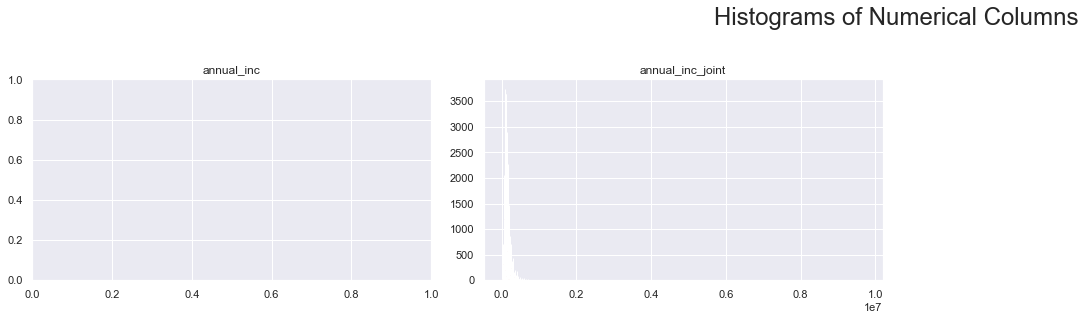

In [17]:
#Histogram:    
fig = plt.figure(figsize=(25, 22))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(CSRP_num.shape[1]):
    plt.subplot(6, 4, i + 1)
    f = plt.gca()
    f.set_title(CSRP_num.columns.values[i])
    
vals = np.size(CSRP_num.iloc[:, i].unique())
if vals >= 10000000:
    vals = 10000000
    
plt.hist(CSRP_num.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [125]:
print('Number of Unique emp_title: %.0f' %  len(df.emp_title.unique()))
print('Too many unique values in emp_title. Use emp_title as a feature? Computational challenge')

Number of Unique emp_title: 429004
Too many unique values in emp_title. Use emp_title as a feature? Computational challenge


In [97]:
c = df.groupby(['emp_length','Default_flg'])['id'].count().rename("count")
print((100* c/c.groupby(level=[0]).sum()).round(2).astype(str) + '%')

emp_length  Default_flg
1 year      0              87.87%
            1              12.13%
10+ years   0              89.09%
            1              10.91%
2 years     0              88.26%
            1              11.74%
3 years     0              88.08%
            1              11.92%
4 years     0              88.22%
            1              11.78%
5 years     0              88.46%
            1              11.54%
6 years     0              88.82%
            1              11.18%
7 years     0              88.39%
            1              11.61%
8 years     0              87.43%
            1              12.57%
9 years     0              87.57%
            1              12.43%
< 1 year    0              89.15%
            1              10.85%
Name: count, dtype: object


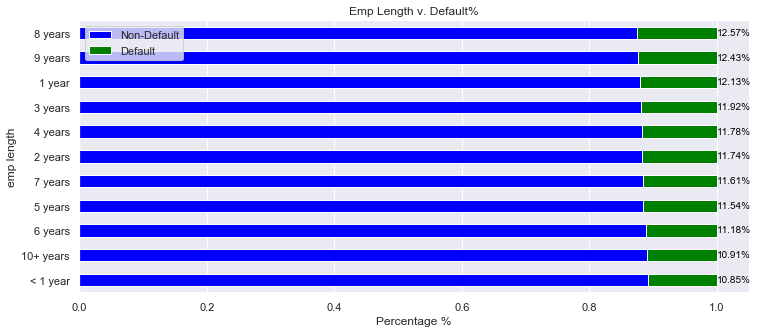

In [126]:
# emp_length vs. default rate
from matplotlib.pyplot import figure
size = plt.figure(figsize=(12, 5)).add_subplot(1, 1, 1)
emp_length_dr0 = df.groupby(
    "emp_length")["Default_flg"].value_counts().unstack()
emp_length_dr_pct = emp_length_dr0.div(emp_length_dr0.sum(axis=1), axis=0)
emp_length_dr_pct = emp_length_dr_pct.fillna(0).sort_values(by=1, ascending=True) 
emp_length_dr_pct.plot.barh(stacked=True, color=['blue', 'green'],
                           ax = size)
for i, v in enumerate(emp_length_dr_pct[1].fillna(0)):
    size.text(1, i-0.09, str(round(v*100,2))+"%", color='black')
plt.legend(['Non-Default','Default'], loc='upper left')
plt.xlabel('Percentage %')
plt.ylabel('emp length')
plt.title('Emp Length v. Default%')
plt.show()

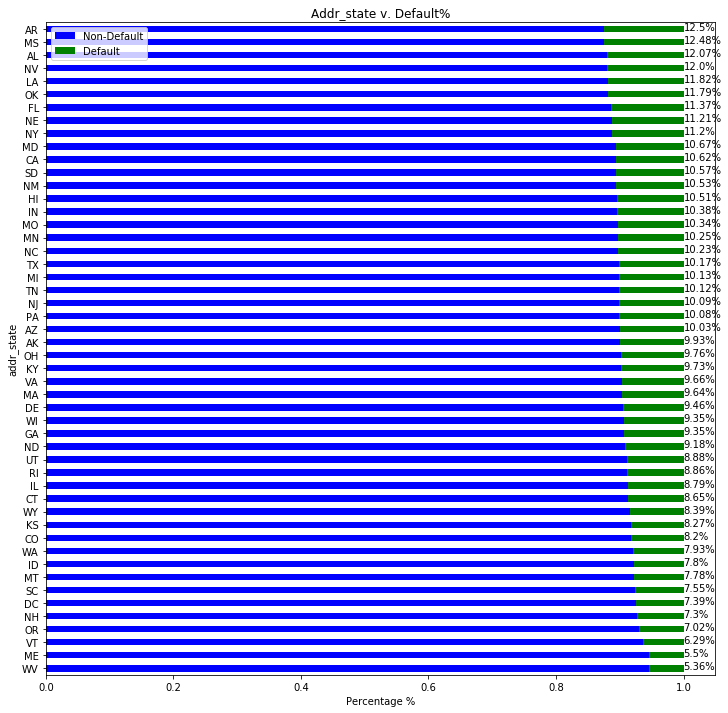

In [68]:
# State vs. default rate
from matplotlib.pyplot import figure
size = plt.figure(figsize=(12, 12)).add_subplot(1, 1, 1)
addr_state_dr0 = df.groupby(
    "addr_state")["Default_flg"].value_counts().unstack()
addr_state_dr_pct = addr_state_dr0.div(addr_state_dr0.sum(axis=1), axis=0)
addr_state_dr_pct = addr_state_dr_pct.fillna(0).sort_values(by=1, ascending=True) 
addr_state_dr_pct.plot.barh(stacked=True, color=['blue', 'green'],
                           ax = size)
for i, v in enumerate(addr_state_dr_pct[1].fillna(0)):
    size.text(1, i-0.09, str(round(v*100,2))+"%", color='black')
plt.legend(['Non-Default','Default'], loc='upper left')
plt.xlabel('Percentage %')
plt.ylabel('addr_state')
plt.title('Addr_state v. Default%')
plt.show()

In [108]:
c = df.groupby(['addr_state','Default_flg'])['id'].count().rename("count")
print((100* c/c.groupby(level=[0]).sum()).round(2).astype(str) + '%')

addr_state  Default_flg
AK          0              88.41%
            1              11.59%
AL          0              86.05%
            1              13.95%
AR          0              85.74%
                            ...  
WI          1              11.18%
WV          0              93.29%
            1               6.71%
WY          0              89.81%
            1              10.19%
Name: count, Length: 100, dtype: object


In [43]:
print(df.purpose.unique())
print(df.title.unique())
c = df.groupby(['purpose','title'])['id'].count().rename("count")
print((100* c/c.groupby(level=[0]).sum()).round(2).astype(str) + '%')

['debt_consolidation' 'credit_card' 'other' 'medical' 'home_improvement'
 'major_purchase' 'car' 'moving' 'small_business' 'vacation'
 'renewable_energy' 'house' 'educational' 'wedding']
['Debt consolidation' 'Credit card refinancing' 'Other' 'Medical expenses'
 'Home improvement' 'Major purchase' 'Car financing'
 'Moving and relocation' 'Business' 'Vacation' 'Green loan' 'Home buying'
 'Learning and training' nan 'odymeds' 'SAVE'
 'Trying to come back to reality!'
 'Paying off higher interest cards & auto'
 'Simple Loan Until Contract Is Completed'
 'Prescription Drug and Medical Costs' 'Pay off Lowes Card'
 'new kitchen for momma!' 'New Baby and New House (CC Consolidate)'
 'Credit Card Consolidation']
purpose   title                  
car       Car financing              99.93%
          Credit card refinancing     0.02%
          Debt consolidation          0.04%
          Major purchase              0.01%
          Other                       0.01%
                                

In [52]:
c = df.groupby(['pub_rec_bankruptcies','Default_flg'])['id'].count().rename("count")
print((100* c/c.groupby(level=[0]).sum()).round(2).astype(str) + '%')

pub_rec_bankruptcies  Default_flg
0.0                   0              90.25%
                      1               9.75%
1.0                   0              87.46%
                      1              12.54%
2.0                   0              81.93%
                      1              18.07%
3.0                   0              81.97%
                      1              18.03%
4.0                   0              80.43%
                      1              19.57%
5.0                   0              80.62%
                      1              19.38%
6.0                   0              72.34%
                      1              27.66%
7.0                   0               50.0%
                      1               50.0%
8.0                   0              42.86%
                      1              57.14%
9.0                   0              100.0%
11.0                  1              100.0%
Name: count, dtype: object


In [53]:
c = df.groupby(['hardship_loan_status','Default_flg'])['id'].count().rename("count")
print((100* c/c.groupby(level=[0]).sum()).round(2).astype(str) + '%')

hardship_loan_status  Default_flg
ACTIVE                0              99.97%
                      1               0.03%
CLOSED                0              100.0%
CURRENT               0              87.34%
                      1              12.66%
Current               0              59.08%
                      1              40.92%
DELINQUENT            0              77.38%
                      1              22.62%
GRACE_CURRENT         0              97.94%
                      1               2.06%
INCOLLECTION          0               98.9%
                      1                1.1%
ISSUED                0              100.0%
In Grace Period       0              35.02%
                      1              64.98%
Issued                0              45.45%
                      1              54.55%
Late (16-30 days)     0              28.18%
                      1              71.82%
Late (31-120 days)    0              34.01%
                      1              65.99

In [54]:
c = df.groupby(['hardship_flag','Default_flg'])['deferral_term'].mean().rename("mean")
print((100* c/c.groupby(level=[0]).sum()).round(2).astype(str) + '%')

hardship_flag  Default_flg
N              0              44.29%
               1              55.71%
Y              0              49.23%
               1              50.77%
Name: mean, dtype: object


In [110]:
# plot a Stacked Bar Chart using matplotlib
df.plot(
    x = 'addr_state',
    y = 'Default_flg'
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

SyntaxError: invalid syntax (<ipython-input-110-7a8644cfd347>, line 5)

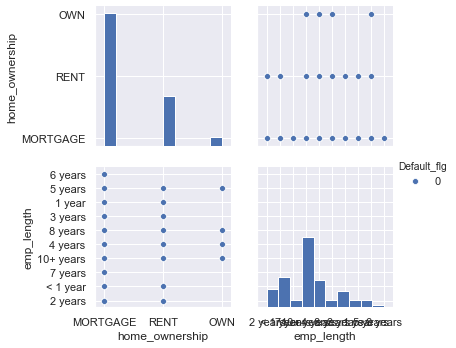

In [117]:
columns=('home_ownership','emp_length')
g= sns.pairplot(df.dropna(), hue = 'Default_flg', diag_kind= 'hist',
             vars = columns,
             plot_kws=dict(alpha=1), 
             diag_kws=dict(alpha=1))

plt.show()

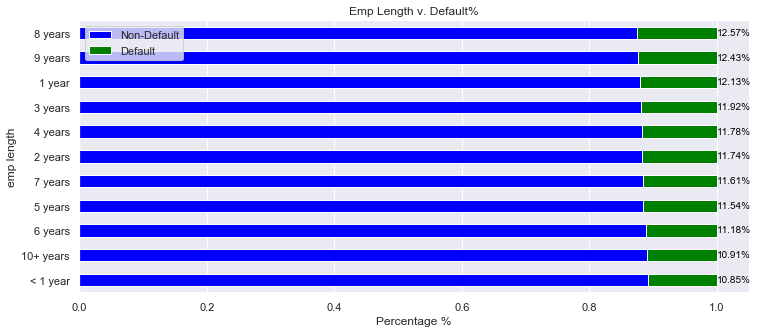

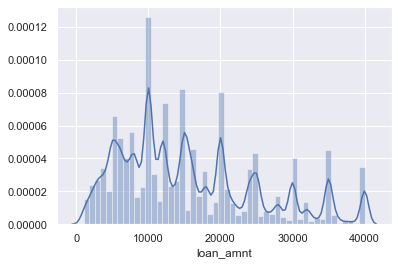

In [40]:
sns.distplot(df['loan_amnt'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B818B6E548>,
      dtype=object)

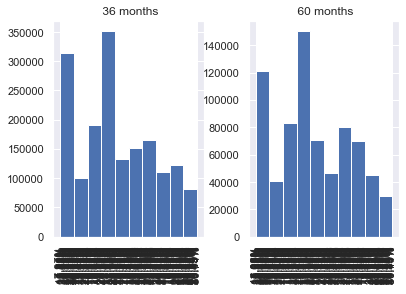

In [41]:
df.hist(by='term', column = 'int_rate')

**1.2 (CSRP) Categorical**

In [ ]:
CSRP_cat = df[['emp_title', 'emp_length', 'addr_state', 'home_ownership', 'purpose', 'title']]

## Section D: Feature Engineering

### Step D.0: Feature Selection

| No. | Feature   | Feature Type    | Feature Engineering   | Model Type   | Model Phase   |
|---:|:-------------|:-----------|:------|:------|:------|
| 1 | sub_grade  | Categorical       | Ordinal Transform   | Logistic Regression     | Phase I     |
| 2 | emp_length  | Categorical    | Ordinal Transform   | Logistic Regression     | Phase I     |
| 3 | addr_state  | Categorical    | OneHotEncoding   | Logistic Regression     | Phase I     |
| 4 | dti / dti_joint  | Numerical    | None   | Logistic Regression     | Phase I     |
| 5 | fico_range_low / fico_range_high  | Numerical    | (fico_range_low+fico_range_high) / 2   | Logistic Regression     | Phase I     |
| 6 | home_ownership  | Categorical    | OneHotEncoding   | Logistic Regression     | Phase I     |
| 7 | purpose  | Categorical    | OneHotEncoding   | Logistic Regression     | Phase I     |
| 8 | annual_inc / annual_inc_joint  | Numerical    | None   | Logistic Regression     | Phase I     |
| 9 | application_type  | Categorical    | Dummy Transform   | Logistic Regression     | Phase I     |
| 10 | total_rec_prncp / funded_amnt  | Numerical    | total_rec_prncp / funded_amnt   | Logistic Regression     | Phase I     |
| 11 | pub_rec_bankruptcies  | Numerical    | None   | Logistic Regression     | Phase I     |
| 12 | hardship_flag  | Categorical    | Dummy Transform   | Random Forest     | Phase II     |
| 13 | hardship_reason  | Categorical    | OneHotEncoding   | Random Forest     | Phase II     |
| 14 | hardship_loan_status  | Categorical    | OneHotEncoding   | Random Forest     | Phase II     |
| 15 | deferral_term  | Numerical    | None   | Random Forest     | Phase II     |
| Train/Test Split | year  | Numerical    | None   | All     | All     |
| Target | loan_status  | Categorical    | None   | All     | All     |
| Target | Default_flg  | Numerical    | None   | All     | All     |

In [355]:
df['year'] = pd.to_datetime(df.issue_d).dt.year
df['month'] = pd.to_datetime(df.issue_d).dt.month
feature_raw = df[['sub_grade','emp_length','addr_state','dti','dti_joint','fico_range_low','fico_range_high','home_ownership', 
'purpose', 'title', 'annual_inc','annual_inc_joint','application_type','total_rec_prncp','funded_amnt',
'pub_rec_bankruptcies','hardship_flag','hardship_reason','hardship_loan_status','deferral_term','month','year','loan_status','Default_flg']]

feature_raw['dti'] = np.where(df.application_type == 'Individual', feature_raw['dti'], feature_raw['dti_joint'])
feature_raw['annual_inc'] = np.where(df.application_type == 'Individual', feature_raw['annual_inc'], feature_raw['annual_inc_joint'])
feature_raw['fico_avg'] = feature_raw[['fico_range_low', 'fico_range_high']].mean(axis=1)
feature_raw['ptf'] = feature_raw['total_rec_prncp'] / feature_raw['funded_amnt']

C:\Users\wangq\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\wangq\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wangq\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [356]:
feature_raw.describe(include='all')

,sub_grade,emp_length,addr_state,dti,dti_joint,fico_range_low,fico_range_high,home_ownership,purpose,title,annual_inc,annual_inc_joint,application_type,total_rec_prncp,funded_amnt,pub_rec_bankruptcies,hardship_flag,hardship_reason,hardship_loan_status,deferral_term,month,year,loan_status,Default_flg,fico_avg,ptf
count,1722081,1580867,1722081,1.722078e+06,119365.000000,1.722081e+06,1.722081e+06,1722081,1722081,1706059,1.722081e+06,1.193680e+05,1722081,1.722081e+06,1.722081e+06,1.722081e+06,1697903,85358,85202,85363.000000,1.722081e+06,1.722081e+06,1722081,1.722081e+06,1.722081e+06,1.722081e+06
unique,35,11,50,NaN,NaN,NaN,NaN,5,14,23,NaN,NaN,2,NaN,NaN,NaN,2,17,14,NaN,NaN,NaN,8,NaN,NaN,NaN
top,A5,10+ years,CA,NaN,NaN,NaN,NaN,MORTGAGE,debt_consolidation,Debt consolidation,NaN,NaN,Individual,NaN,NaN,NaN,N,INCOMECURT,ACTIVE,NaN,NaN,NaN,Fully Paid,NaN,NaN,NaN
freq,120404,530129,242007,NaN,NaN,NaN,NaN,781043,908683,899077,NaN,NaN,1602713,NaN,NaN,NaN,1626072,49713,68746,NaN,NaN,NaN,883872,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.823783e+01,19.032028,7.006124e+02,7.046126e+02,NaN,NaN,NaN,8.323521e+04,1.283971e+05,NaN,8.983116e+03,1.311324e+04,1.278494e-01,NaN,NaN,NaN,2.230697,6.453633e+00,2.017265e+03,NaN,1.011427e-01,7.026125e+02,6.996364e-01
std,NaN,NaN,NaN,8.624683e+00,8.136162,3.448452e+01,3.448546e+01,NaN,NaN,NaN,1.008444e+05,8.606715e+04,NaN,8.177318e+03,9.095175e+03,3.611139e-01,NaN,NaN,NaN,0.558076,3.454197e+00,1.521346e+00,NaN,3.015177e-01,3.448499e+01,3.570721e-01
min,NaN,NaN,NaN,-1.000000e+00,0.000000,6.600000e+02,6.640000e+02,NaN,NaN,NaN,1.900000e+03,5.693510e+03,NaN,0.000000e+00,1.000000e+03,0.000000e+00,NaN,NaN,NaN,0.000000,1.000000e+00,2.015000e+03,NaN,0.000000e+00,6.620000e+02,0.000000e+00
25%,NaN,NaN,NaN,1.174000e+01,13.010000,6.750000e+02,6.790000e+02,NaN,NaN,NaN,4.708400e+04,8.217150e+04,NaN,2.980820e+03,6.000000e+03,0.000000e+00,NaN,NaN,NaN,2.000000,3.000000e+00,2.016000e+03,NaN,0.000000e+00,6.770000e+02,3.402560e-01
50%,NaN,NaN,NaN,1.766000e+01,18.480000,6.950000e+02,6.990000e+02,NaN,NaN,NaN,6.800000e+04,1.120000e+05,NaN,6.475810e+03,1.000000e+04,0.000000e+00,NaN,NaN,NaN,2.000000,7.000000e+00,2.017000e+03,NaN,0.000000e+00,6.970000e+02,1.000000e+00
75%,NaN,NaN,NaN,2.433000e+01,24.650000,7.200000e+02,7.240000e+02,NaN,NaN,NaN,1.000000e+05,1.540000e+05,NaN,1.200000e+04,1.800000e+04,0.000000e+00,NaN,NaN,NaN,2.000000,9.000000e+00,2.019000e+03,NaN,0.000000e+00,7.220000e+02,1.000000e+00


### Step D.1: Missing data imputation

In [357]:
#feature_raw.isna().any()
#check nan percentage
def check_na(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    return missing_value_df
check_na(feature_raw)

,column_name,percent_missing
sub_grade,sub_grade,0.000000
emp_length,emp_length,8.200195
addr_state,addr_state,0.000000
dti,dti,0.000174
dti_joint,dti_joint,93.068561
fico_range_low,fico_range_low,0.000000
fico_range_high,fico_range_high,0.000000
home_ownership,home_ownership,0.000000
purpose,purpose,0.000000
title,title,0.930386


In [358]:
#fill in na value for emp_length and dti
feature_raw['emp_length'] = feature_raw['emp_length'].fillna('unknown')
feature_raw['dti'] = feature_raw['dti'].fillna(value=feature_raw['dti'].mean(), inplace=False)

C:\Users\wangq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wangq\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [359]:
# Create feature dataset for Logistic Regression
feature_raw_lr = feature_raw[['sub_grade','emp_length','addr_state','dti','fico_avg','home_ownership','purpose','annual_inc',  
'application_type','ptf','pub_rec_bankruptcies','month','year','loan_status','Default_flg']]

In [360]:
#check nan percentage
def check_na(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    return missing_value_df
check_na(feature_raw_lr)

,column_name,percent_missing
sub_grade,sub_grade,0.0
emp_length,emp_length,0.0
addr_state,addr_state,0.0
dti,dti,0.0
fico_avg,fico_avg,0.0
home_ownership,home_ownership,0.0
purpose,purpose,0.0
annual_inc,annual_inc,0.0
application_type,application_type,0.0
ptf,ptf,0.0


### Step D.2: Categorical data encoding

In [361]:
categorical_features = ['sub_grade','emp_length','addr_state','home_ownership','purpose','application_type']
for col in categorical_features:
    print(f"{feature_raw_lr[col].str.split(',').explode().nunique()} unique levels in {col}")

35 unique levels in sub_grade
12 unique levels in emp_length
50 unique levels in addr_state
5 unique levels in home_ownership
14 unique levels in purpose
2 unique levels in application_type


In [362]:
print(f"sub_grade: {feature_raw_lr.sub_grade.unique()}")
print(f"emp_length: {feature_raw_lr.emp_length.unique()}")
print(f"addr_state: {feature_raw_lr.addr_state.unique()}")
print(f"home_ownership: {feature_raw_lr.home_ownership.unique()}")
print(f"application_type: {feature_raw_lr.application_type.unique()}")
#print(f"hardship_flag: {feature_raw_lr.hardship_flag.unique()}")

sub_grade: ['A5' 'B5' 'A3' 'B1' 'C5' 'C2' 'C4' 'E2' 'G2' 'E3' 'D5' 'C1' 'A2' 'B4'
 'C3' 'D4' 'A1' 'B2' 'A4' 'F4' 'D1' 'B3' 'D3' 'D2' 'E4' 'F2' 'F3' 'E1'
 'F1' 'G1' 'F5' 'E5' 'G4' 'G5' 'G3']
emp_length: ['10+ years' '5 years' '< 1 year' '3 years' '4 years' 'unknown' '6 years'
 '2 years' '7 years' '8 years' '1 year' '9 years']
addr_state: ['CA' 'NJ' 'VA' 'TX' 'IL' 'OR' 'NY' 'MA' 'CT' 'FL' 'MI' 'SC' 'WA' 'NC'
 'NV' 'NM' 'MS' 'LA' 'PA' 'MD' 'AZ' 'KY' 'GA' 'CO' 'OH' 'HI' 'MT' 'IN'
 'MO' 'AL' 'MN' 'NE' 'WI' 'AR' 'KS' 'TN' 'OK' 'NH' 'ME' 'WY' 'ID' 'RI'
 'DE' 'VT' 'AK' 'ND' 'UT' 'SD' 'DC' 'WV']
home_ownership: ['OWN' 'MORTGAGE' 'RENT' 'ANY' 'NONE']
application_type: ['Individual' 'Joint App']


In [363]:
# sub_grade: ordinal encoding
map_dict={'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
          'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
          'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
          'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
          'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
          'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
          'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35,
         }

class sub_grade_ordinal_Transformer():
    def __init__(self):
        self.counts = 0
        
    def transform(self, X, y=None):
        # input X， series
        df=pd.DataFrame()
        df['sub_grade']=X.sub_grade.map(map_dict)
        return df                                                                                
    
    def fit_transform(self, X, y=None):
        #self.fit(X)
        return self.transform(X)

sgot = sub_grade_ordinal_Transformer()
sgot.fit_transform(feature_raw_lr).head()

feature_raw_lr[['sub_grade']]=sgot.transform(feature_raw_lr)
#plt.scatter(feature_raw_lr['sub_grade'],feature_raw_lr['Default_flg'])

C:\Users\wangq\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [364]:
# emp_length: ordinal encoding
map_dict={'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,  
          '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10, 'unknown': 11}

class emp_length_ordinal_Transformer():
    def __init__(self):
        self.counts = 0
        
    def transform(self, X, y=None):
        # input X， series
        df=pd.DataFrame()
        df['emp_length']=X.emp_length.map(map_dict)
        return df                                                                                
    
    def fit_transform(self, X, y=None):
        #self.fit(X)
        return self.transform(X)

elot = emp_length_ordinal_Transformer()
elot.fit_transform(feature_raw_lr).head()

feature_raw_lr[['emp_length']]=elot.transform(feature_raw_lr)
#plt.scatter(feature_raw_lr['emp_length'],feature_raw_lr['Default_flg'])

In [365]:
# Dummy transfer: 'addr_state', 'home_ownership', 'purpose','application_type'
feature_raw_dt_lr = pd.get_dummies(feature_raw_lr, columns=['addr_state', 'home_ownership', 'purpose','application_type'], drop_first=True)
feature_raw_dt_lr.head()

,sub_grade,emp_length,dti,fico_avg,annual_inc,ptf,pub_rec_bankruptcies,month,year,loan_status,Default_flg,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App
0,5,10,27.74,717.0,42000.0,1.000000,1.0,9,2017,Fully Paid,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,10,10,12.35,717.0,155000.0,0.807535,0.0,9,2017,Current,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,5,15.94,702.0,79077.0,0.846536,0.0,9,2017,Current,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,17.87,787.0,163000.0,0.700816,0.0,9,2017,Late (31-120 days),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,5,10,12.27,712.0,32000.0,0.966813,1.0,9,2017,Current,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Step D.3: Numerical data binning (tbd)

In [366]:
feature_raw_dt_lr['annual_inc'] = np.log(feature_raw_dt_lr.annual_inc)
feature_raw_dt_lr.describe(include='all')

,sub_grade,emp_length,dti,fico_avg,annual_inc,ptf,pub_rec_bankruptcies,month,year,loan_status,Default_flg,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App
count,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1722081,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06,1.722081e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,883872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.171439e+00,6.103650e+00,1.823783e+01,7.026125e+02,1.114113e+01,6.996364e-01,1.278494e-01,6.453633e+00,2.017265e+03,NaN,1.011427e-01,1.118821e-02,7.518229e-03,2.444078e-02,1.405317e-01,2.055072e-02,1.589472e-02,2.286768e-03,2.791971e-03,7.512248e-02,3.230975e-02,4.502111e-03,2.701383e-03,4.052539e-02,1.637437e-02,7.978138e-03,9.277148e-03,1.084792e-02,2.281368e-02,2.294375e-02,2.842491e-03,2.587567e-02,1.685577e-02,1.567464e-02,6.285999e-03,2.777454e-03,2.686633e-02,2.037651e-03,4.474819e-03,4.942857e-03,3.614987e-02,5.208234e-03,1.517989e-02,8.316566e-02,3.217619e-02,8.892729e-03,1.200176e-02,3.186319e-02,4.383650e-03,1.211557e-02,1.949966e-03,1.631921e-02,8.522596e-02,6.322002e-03,2.590935e-02,2.278638e-03,2.076906e-02,1.314282e-02,3.588101e-03,1.903511e-03,4.535460e-01,2.322771e-06,1.235302e-01,4.214871e-01,2.465076e-01,5.276657e-01,1.161386e-06,6

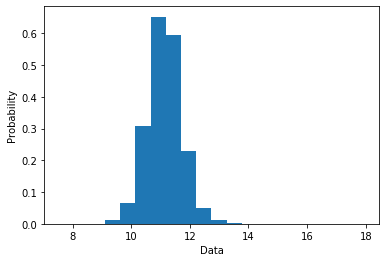

In [367]:
plt.hist(feature_raw_dt_lr['annual_inc'], density=True, bins=20)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [368]:
check_na(feature_raw_dt_lr)

,column_name,percent_missing
sub_grade,sub_grade,0.0
emp_length,emp_length,0.0
dti,dti,0.0
fico_avg,fico_avg,0.0
annual_inc,annual_inc,0.0
...,...,...
purpose_renewable_energy,purpose_renewable_energy,0.0
purpose_small_business,purpose_small_business,0.0
purpose_vacation,purpose_vacation,0.0
purpose_wedding,purpose_wedding,0.0


## Section E: Model Development

### Step E.1: Split training and test datasets

In [445]:
train_raw = feature_raw_dt_lr[(feature_raw_dt_lr.year == 2016) &
                              ((feature_raw_dt_lr.loan_status == 'Fully Paid') | 
                              (feature_raw_dt_lr.loan_status == 'Charged Off') |
                              (feature_raw_dt_lr.loan_status == 'Default'))].reset_index(drop=True)
test_raw = feature_raw_dt_lr[(feature_raw_dt_lr.year == 2018) &
                              ((feature_raw_dt_lr.loan_status == 'Fully Paid') | 
                              (feature_raw_dt_lr.loan_status == 'Charged Off') |
                              (feature_raw_dt_lr.loan_status == 'Default'))].reset_index(drop=True)
train_raw.head()
#test_raw.head()

,sub_grade,emp_length,dti,fico_avg,annual_inc,ptf,pub_rec_bankruptcies,month,year,loan_status,Default_flg,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App
0,8,4,33.72,672.0,11.034890,1.000000,0.0,3,2016,Fully Paid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,10,19.05,752.0,10.799576,1.000000,0.0,3,2016,Fully Paid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,10,5.25,697.0,11.957611,1.000000,0.0,3,2016,Fully Paid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,13,2,38.29,667.0,10.736397,1.000000,0.0,3,2016,Fully Paid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,10,24.11,672.0,11.338572,0.106663,1.0,3,2016,Charged Off,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [446]:
print(train_raw.shape)
print(test_raw.shape)

(323436, 78)
(145475, 78)


In [447]:
print(train_raw.groupby(['year','loan_status','Default_flg'])['annual_inc'].count().rename("count"))
print(test_raw.groupby(['year','loan_status','Default_flg'])['annual_inc'].count().rename("count"))

year  loan_status  Default_flg
2016  Charged Off  1               51299
      Default      1                  61
      Fully Paid   0              272076
Name: count, dtype: int64
year  loan_status  Default_flg
2018  Charged Off  1               28919
      Default      1                  68
      Fully Paid   0              116488
Name: count, dtype: int64


### Step E.2: Split the dataset into dependent and independent variables

In [448]:
features = list(train_raw.columns)
to_remove = set(['Default_flg','month','year','loan_status','ptf'])
target = 'Default_flg'
features = [ e for e in features if e not in to_remove ]
print(features)
print(target)

['sub_grade', 'emp_length', 'dti', 'fico_avg', 'annual_inc', 'pub_rec_bankruptcies', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO', 'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL', 'addr_state_GA', 'addr_state_HI', 'addr_state_ID', 'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_KY', 'addr_state_LA', 'addr_state_MA', 'addr_state_MD', 'addr_state_ME', 'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_MT', 'addr_state_NC', 'addr_state_ND', 'addr_state_NE', 'addr_state_NH', 'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY', 'addr_state_OH', 'addr_state_OK', 'addr_state_OR', 'addr_state_PA', 'addr_state_RI', 'addr_state_SC', 'addr_state_SD', 'addr_state_TN', 'addr_state_TX', 'addr_state_UT', 'addr_state_VA', 'addr_state_VT', 'addr_state_WA', 'addr_state_WI', 'addr_state_WV', 'addr_state_WY', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OWN', 'home_owne

In [449]:
X_train = train_raw[features]
y_train = train_raw[target]

X_test = test_raw[features]
y_test = test_raw[target]

In [450]:
X_train.head()

,sub_grade,emp_length,dti,fico_avg,annual_inc,pub_rec_bankruptcies,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App
0,8,4,33.72,672.0,11.034890,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,10,19.05,752.0,10.799576,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,10,5.25,697.0,11.957611,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,13,2,38.29,667.0,10.736397,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,10,24.11,672.0,11.338572,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [451]:
print(y_train.unique())
print(y_test.unique())

[0 1]
[0 1]


In [452]:
X_train.shape

(323436, 73)

### Step E.3: Pipeline construction

In [453]:
%%time
steps = [('rescale', MinMaxScaler()),
         ('poly', PolynomialFeatures()),
         ('LR', LogisticRegression(random_state = 0, class_weight = 'balanced'))]
model = Pipeline(steps)
model = model.fit(X_train, y_train)

C:\Users\wangq\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 2min 26s


In [454]:
%%time
y_train_pred = model.predict(X_train)
unique, frequency = np.unique(y_train_pred,
                              return_counts = True) 
print("Training: predicted values and counts:\n", np.asarray((unique, frequency )))
y_test_pred = model.predict(X_test)
unique, frequency = np.unique(y_test_pred,
                              return_counts = True) 
print("Testing: predicted values and counts:\n", np.asarray((unique, frequency )))

Training: predicted values and counts:
 [[     0      1]
 [181160 142276]]
Testing: predicted values and counts:
 [[    0     1]
 [92295 53180]]
Wall time: 1min 29s


In [455]:
from sklearn.metrics import confusion_matrix

print('training')
print(confusion_matrix(y_train, y_train_pred))
print('testing')
print(confusion_matrix(y_test, y_test_pred))

training
[[164346 107730]
 [ 16814  34546]]
testing
[[79930 36558]
 [12365 16622]]


In [456]:
%%time
y_train_proba = model.predict_proba(X_train)
#print(y_train_proba)
y_test_proba = model.predict_proba(X_test)
#print(y_test_proba[:,1])

Wall time: 1min 22s


In [457]:
%%time
from sklearn.metrics import roc_auc_score
print('Training roc_auc_scores: %.3f' % roc_auc_score(y_train, y_train_proba[:,1]))
#print('Training roc_auc_scores: %.3f' % roc_auc_score(y_train, model.decision_function(X_train)))
print('Testing roc_auc_scores: %.3f' % roc_auc_score(y_test, model.decision_function(X_test)))

Training roc_auc_scores: 0.692
Testing roc_auc_scores: 0.682
Wall time: 15.8 s


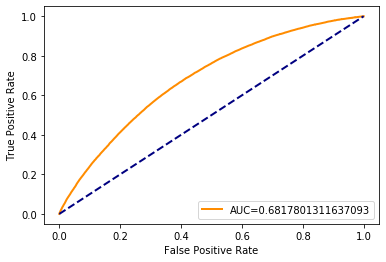

Wall time: 602 ms


In [458]:
%%time
from sklearn.metrics import roc_curve, auc
#define metrics
y_pred_proba = y_test_proba[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
lw = 2
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc),color='darkorange',lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()